In [1]:
from keras.datasets import cifar100
from keras.callbacks import EarlyStopping
from UniversalStyleTransfer import UniversalStyleTransfer
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

model = UniversalStyleTransfer((32, 32, 3), lam=10)

# TODO: Improve API so users don't need to manually specify loss functions
model.compile(optimizer='adam', loss={
    'reconstruction': model.reconstruction_loss,
    'feature': model.feature_loss
})

/home/tadenoud/.virtualenvs/ml/local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Compiling autoencoder 1


In [2]:
# TODO: Improve API so users don't need to pass two label datasets
train = False

if train:
    model.fit(
        x_train, [x_train, x_train],  # Second label data is not used. Using a hack to get feature_loss working
        epochs=200,
        batch_size=128,
        callbacks=[
            EarlyStopping(patience=3, min_delta=0.1)
        ],
        validation_data=(x_test, [x_test, x_test])
    )

    model.save_weights(prefix="autoencoder")

In [3]:
model.load_weights(prefix="../weights/autoencoder")

Loading weights 1


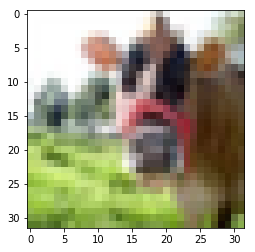

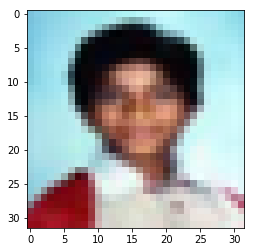

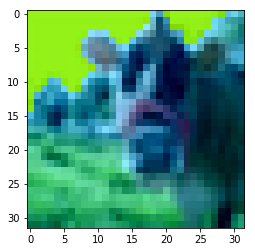

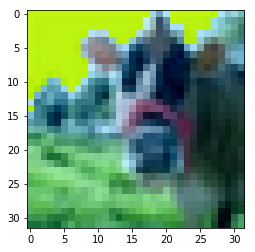

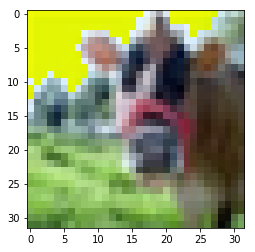

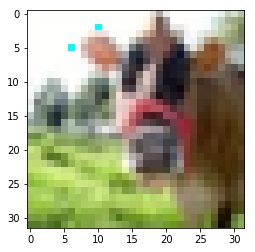

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline

# TODO: Sanity check all autoencoder outputs
img = x_train[0]
style = x_train[3]
plt.imshow(img)
plt.show()
plt.imshow(style)
plt.show()

pred = model.stylize(img, style, 0.1)
plt.imshow(pred)
plt.show()

pred = model.stylize(img, style, 0.5)
plt.imshow(pred)
plt.show()

pred = model.stylize(img, style, 0.9)
plt.imshow(pred)
plt.show()

for autoencoder, encoder in zip(model._autoencoders, model._encoders):
    pred = autoencoder.predict(np.expand_dims(img, axis=0))

    plt.imshow(pred[0].squeeze())
    plt.show()

In [5]:
import h5py
f = h5py.File('./weights_1.h5')
print(f.attrs)

<Attributes of HDF5 object at 139738508679512>


In [6]:
model._autoencoder1.layers[1].save_weights("encoder_1.h5")